In [33]:
from mplsoccer import VerticalPitch, Sbopen
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

In [34]:
# Spain vs Poland
MATCH_ID = 3788762
TEAM = 'Poland'
GOALKEEPER = 'Wojciech Szczęsny'

parser = Sbopen()
df, related, freeze, tactics = parser.event(MATCH_ID)

In [35]:
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'sub_type_id', 'sub_type_name',
       'body_part_id', 'body_part_name', 'x', 'y', 'outcome_id',
       'outcome_name', 'out', 'under_pressure',
       'ball_recovery_recovery_failure', 'pass_deflected', 'aerial_won',
       'counterpress', 'pass_switch', 'off_camera', 'foul_won_defensive',
       'shot_statsbomb_xg', 'end_z', 'technique_id', 'technique_name',
       'goalkeeper_position_id', 'goalkeeper_position_name', 'pass_cross',
       'pass_cut_back', 'pass_assisted_shot_id', 'pass_shot_assist',
    

In [36]:
mask_team1_goalkeeper = (df.type_name == 'Pass') & (df.team_name == TEAM) & (df.player_name == GOALKEEPER)

In [37]:
mask_team1_goalkeeper

0       False
1       False
2       False
3       False
4       False
        ...  
3648    False
3649    False
3650    False
3651    False
3652    False
Length: 3653, dtype: bool

In [38]:
df_pass = df.loc[mask_team1_goalkeeper, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]
mask_complete = df_pass.outcome_name.isnull()

In [39]:
df_pass

,x,y,end_x,end_y,outcome_name
39,16.3,46.6,67.4,72.0,NaN
258,5.6,35.0,43.5,65.8,NaN
506,13.9,45.9,69.6,75.9,NaN
518,22.1,57.9,67.8,69.7,Incomplete
605,7.0,44.1,75.5,67.5,Incomplete
979,10.5,35.2,27.8,15.8,NaN
1302,7.0,44.1,70.2,55.4,Incomplete
1412,7.0,44.1,75.1,52.4,Incomplete
1446,11.6,36.5,65.9,54.3,Incomplete
1628,19.1,55.1,80.3,66.7,Incomplete


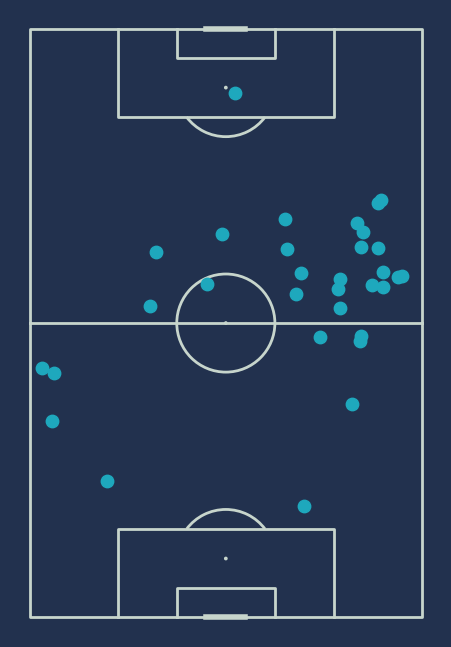

In [40]:
# Set up the pitch
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22314E', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(4.4, 6.4), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22314E')

# Plot the completed passes
# pitch.arrows(df_pass[mask_complete].x, df_pass[mask_complete].y,
#              df_pass[mask_complete].end_x, df_pass[mask_complete].end_y, width=2,
#              headwidth=10, headlength=10, color='#ad993c', ax=ax, label='completed passes')

pass_nodes = pitch.scatter(df_pass.end_x, df_pass.end_y,
                           s=80,
                           color='#1EA8BD', edgecolors='#1EA8BD', linewidth=1, alpha=1, ax=ax)


na podstawie heat mapy

In [41]:
# path effects
path_eff = [path_effects.Stroke(linewidth=1.5, foreground='black'),
            path_effects.Normal()]

In [68]:
import numpy as np

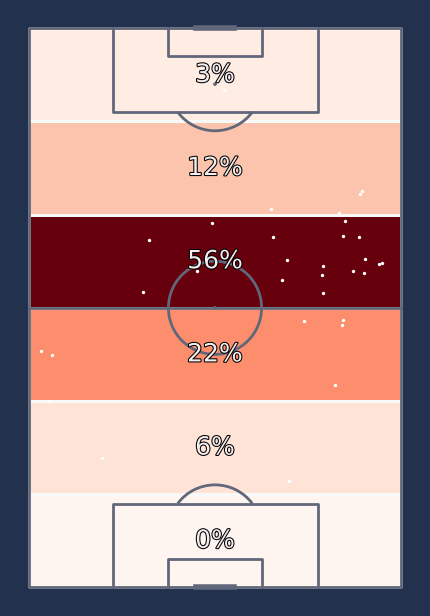

In [77]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22314E', line_color='#61677A')
fig, ax = pitch.draw(figsize=(4.4, 6.4))
fig.set_facecolor('#22314E')


bin_statistic = pitch.bin_statistic(df_pass.end_x, df_pass.end_y, statistic='count', bins=(6, 1), normalize=True)
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

pitch.scatter(df_pass.end_x, df_pass.end_y, c='white', s=2, ax=ax)


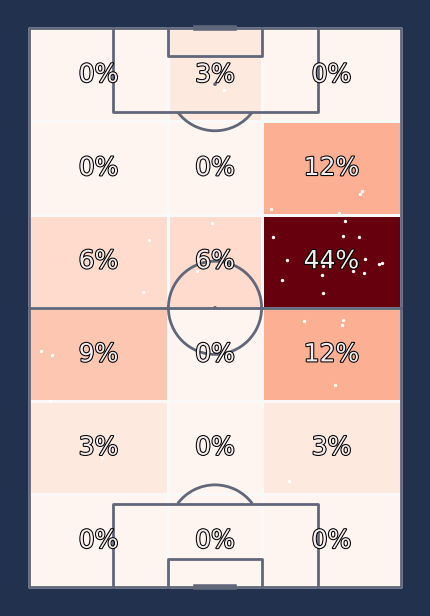

In [76]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22314E', line_color='#61677A')
fig, ax = pitch.draw(figsize=(4.4, 6.4))
fig.set_facecolor('#22314E')

bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=7)
bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,
                          pitch.dim.six_yard_top, pitch.dim.top]))


bin_statistic = pitch.bin_statistic(df_pass.end_x, df_pass.end_y, statistic='count', bins=(bin_x, bin_y), normalize=True)
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

pitch.scatter(df_pass.end_x, df_pass.end_y, c='white', s=2, ax=ax)